1. SETUP AND LOADING


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('car_insurance_claim.csv')
sns.set_style('whitegrid')


In [4]:
 df.shape

(10302, 27)

In [5]:
df.describe()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,CLAIM_FLAG
count,1.030200e+04,10302.000000,10295.000000,10302.000000,9754.000000,10302.000000,10302.000000,10302.000000,10302.000000,9663.000000,10302.000000
mean,4.956631e+08,0.169288,44.837397,0.720443,10.474062,33.416424,5.329159,0.800718,1.710153,8.298148,0.266550
std,2.864675e+08,0.506512,8.606445,1.116323,4.108943,15.869687,4.110795,1.154079,2.159015,5.714450,0.442177
min,6.317500e+04,0.000000,16.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-3.000000,0.000000
25%,2.442869e+08,0.000000,39.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.970043e+08,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000,0.000000
75%,7.394551e+08,0.000000,51.000000,1.000000,13.000000,44.000000,7.000000,2.000000,3.000000,12.000000,1.000000
max,9.999264e+08,4.000000,81.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000,1.000000


In [6]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

Index(['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE',
       'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

In [7]:
 df.isna().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

2. DATA CLEANING AND PREPROCESSING


In [11]:
# This is a crucial step for this dataset.
# We need to convert columns with money values from text to numbers.
money_cols = ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM', 'CLM_AMT']

   

# Also, let's look at the data types and fix any others if needed
print("Data types after cleaning:")
df.info()



Data types after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   float64
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   float64
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  float64
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19

 3. EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION


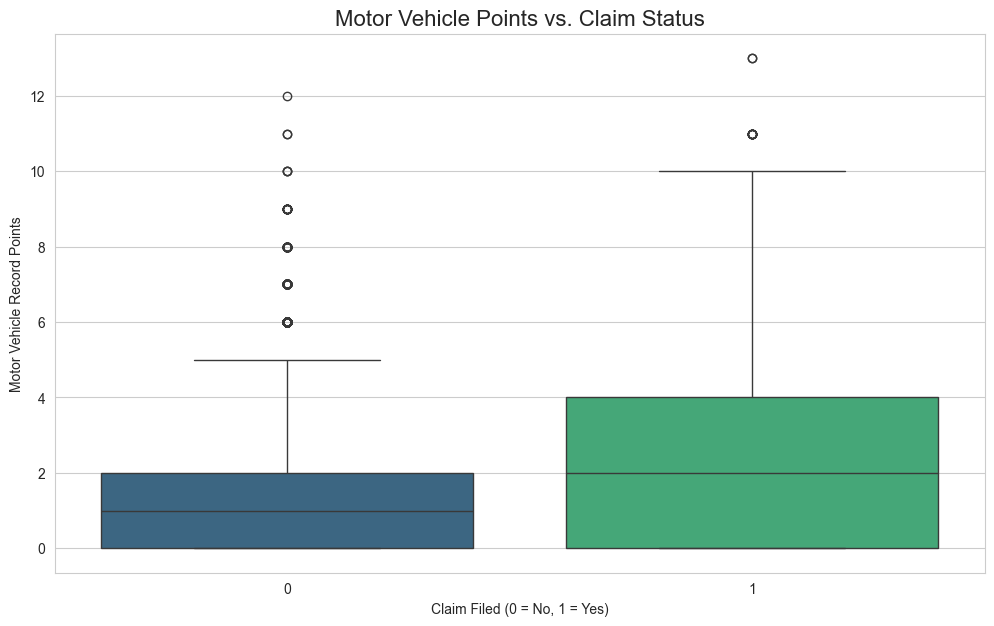

In [16]:
# -- Investigation 1: Driving History vs. Claims --
# Hypothesis: People with more MVR points are more likely to make a claim.
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='CLAIM_FLAG', y='MVR_PTS', hue='CLAIM_FLAG', palette='viridis', legend=False)
plt.title('Motor Vehicle Points vs. Claim Status', fontsize=16)
plt.xlabel('Claim Filed (0 = No, 1 = Yes)')
plt.ylabel('Motor Vehicle Record Points')
plt.show()

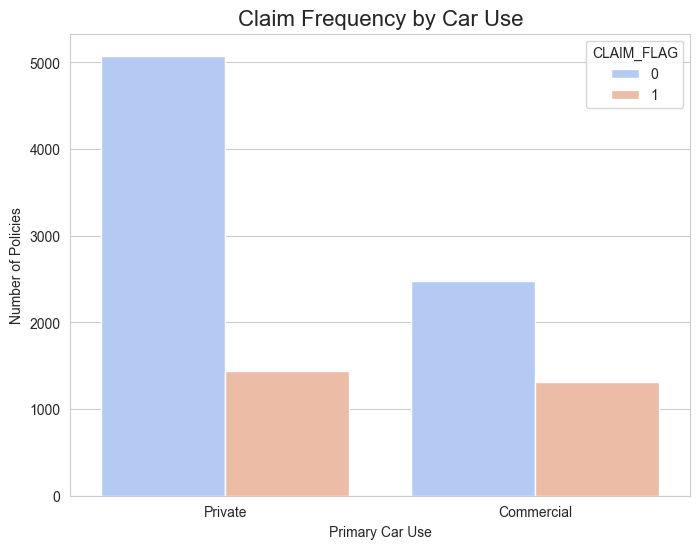

In [13]:
# -- Investigation 2: Car Use vs. Claims --
# Hypothesis: The primary use of the car might influence claim frequency.
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='CAR_USE', hue='CLAIM_FLAG', palette='coolwarm')
plt.title('Claim Frequency by Car Use', fontsize=16)
plt.xlabel('Primary Car Use')
plt.ylabel('Number of Policies')
plt.show()



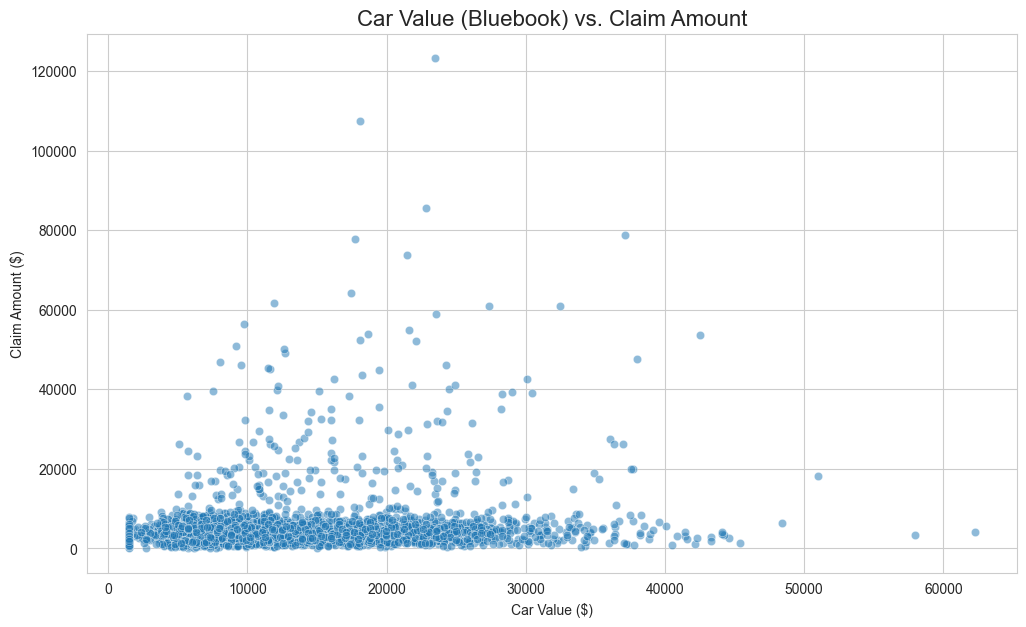

In [14]:
# -- Investigation 3: Car Value vs. Claim Amount --
# Hypothesis: Is there a relationship between the car's value and the claim amount?
plt.figure(figsize=(12, 7))
# We only plot for claims that were actually made (CLAIM_FLAG == 1)
sns.scatterplot(data=df[df['CLAIM_FLAG'] == 1], x='BLUEBOOK', y='CLM_AMT', alpha=0.5)
plt.title('Car Value (Bluebook) vs. Claim Amount', fontsize=16)
plt.xlabel('Car Value ($)')
plt.ylabel('Claim Amount ($)')
plt.show()



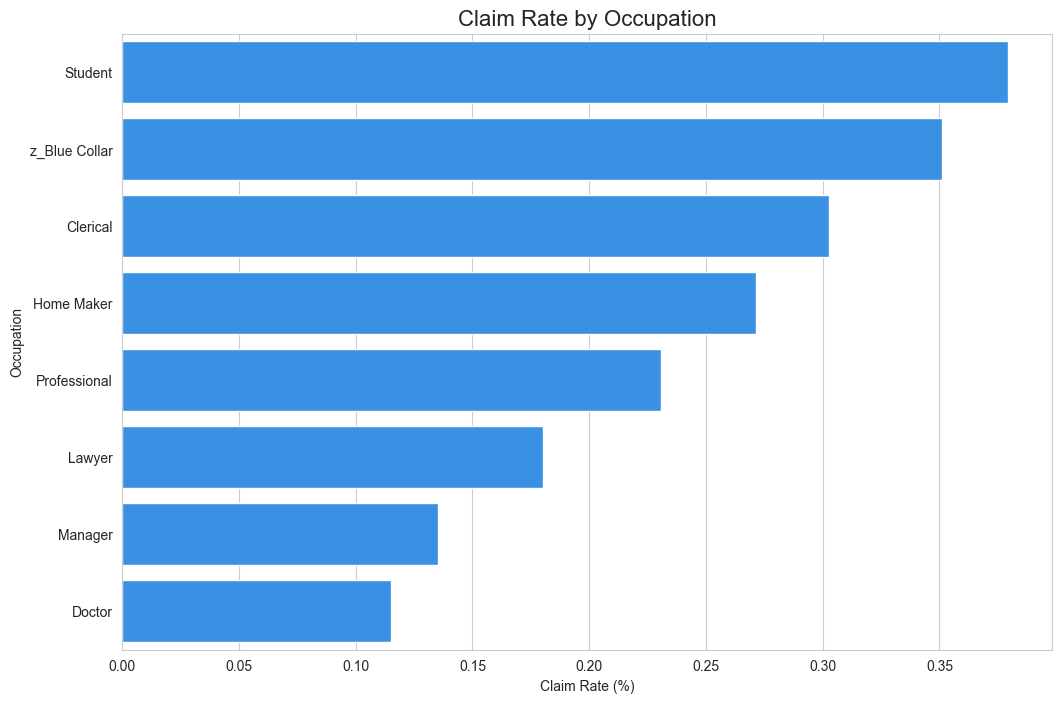

In [15]:
# -- Investigation 4: Occupation vs. Claims --
# Hypothesis: Do certain occupations file more claims?
# Let's calculate the claim rate for each occupation to be fair.
occupation_claims = df.groupby('OCCUPATION')['CLAIM_FLAG'].value_counts(normalize=True).unstack()
occupation_claims = occupation_claims.sort_values(1, ascending=False) # Sort by claim rate
plt.figure(figsize=(12, 8))
sns.barplot(x=occupation_claims[1], y=occupation_claims.index, color='dodgerblue')
plt.title('Claim Rate by Occupation', fontsize=16)
plt.xlabel('Claim Rate (%)')
plt.ylabel('Occupation')
plt.show()

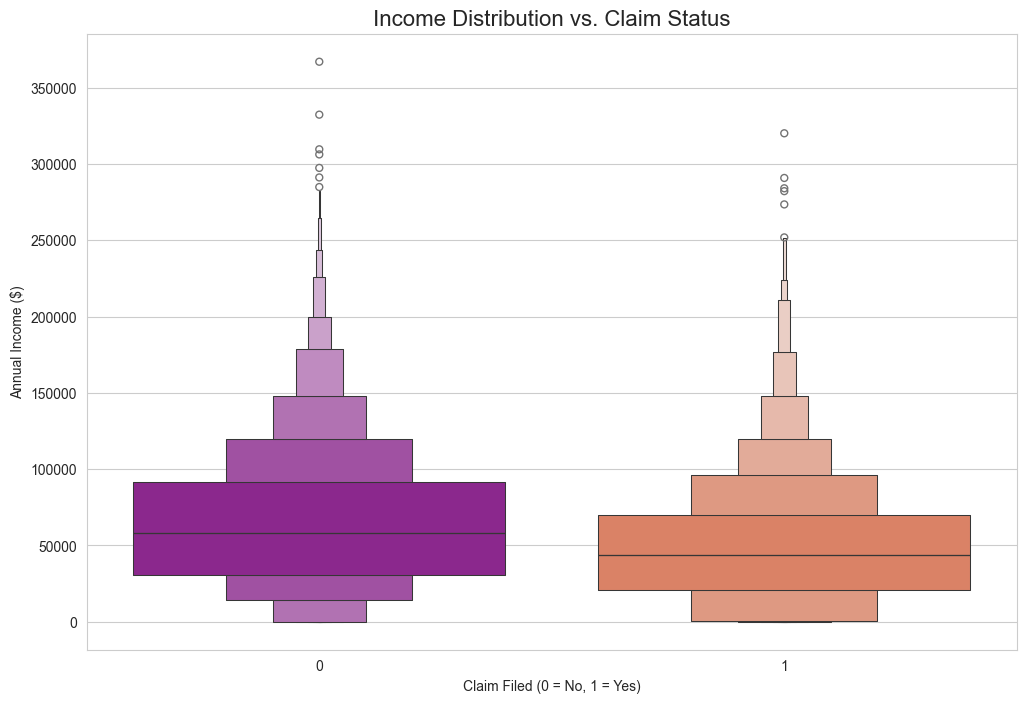

In [20]:
# -- Investigation 5 (New): Income Distribution vs. Claims (Boxen Plot) --
plt.figure(figsize=(12, 8))
sns.boxenplot(data=df, x='CLAIM_FLAG', y='INCOME', hue='CLAIM_FLAG', palette='plasma', legend=False)
plt.title('Income Distribution vs. Claim Status', fontsize=16)
plt.xlabel('Claim Filed (0 = No, 1 = Yes)')
plt.ylabel('Annual Income ($)')
plt.show()

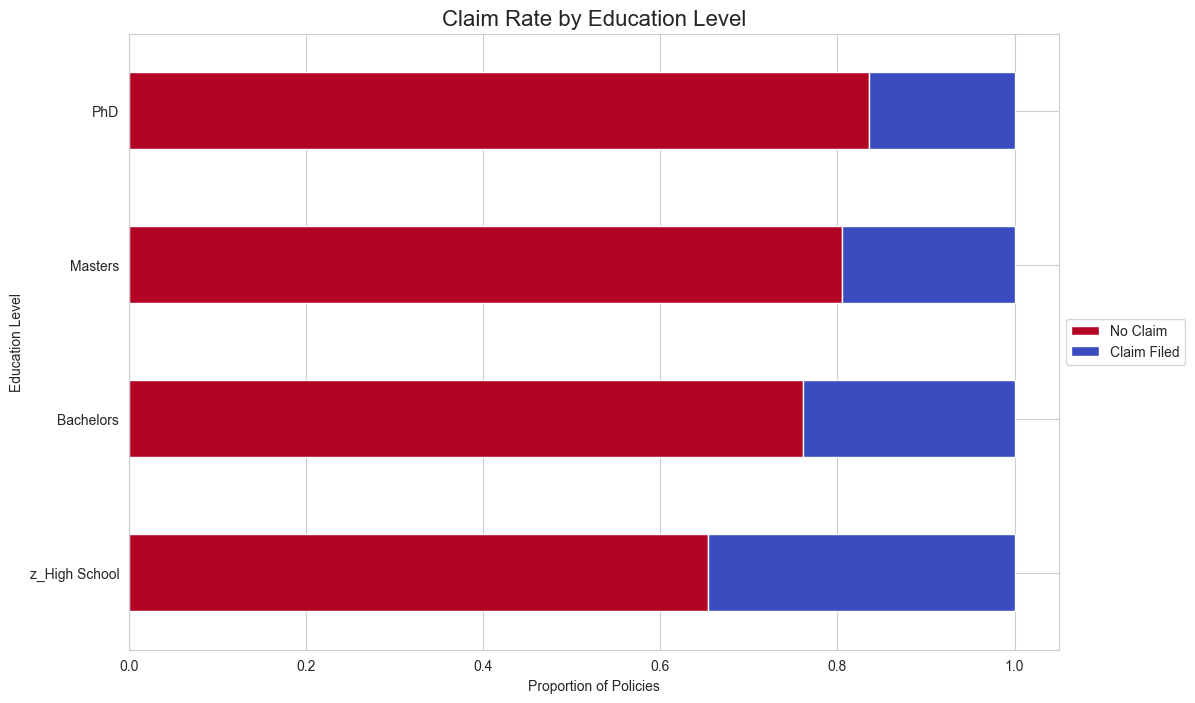

In [18]:
# -- Investigation 6: Education Level vs. Claims (Stacked Bar Chart) --
education_claims = df.groupby('EDUCATION')['CLAIM_FLAG'].value_counts(normalize=True).unstack().fillna(0)
# Ensure a logical order for education levels
education_order = ['High School', 'Bachelors', 'Masters', 'PhD']
education_claims = education_claims.reindex(education_order)
education_claims.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='coolwarm_r')
plt.title('Claim Rate by Education Level', fontsize=16)
plt.xlabel('Proportion of Policies')
plt.ylabel('Education Level')
plt.legend(['No Claim', 'Claim Filed'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [1]:
# -- Investigation 7: Correlation Between Numerical Features (Heatmap) --
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(15, 12))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

#Understanding the Correlation Heatmap
#The heatmap is a powerful tool that gives you a quick overview of how all the numerical variables in your dataset relate to each other. It's a visual representation of a correlation matrix.

#What is Correlation?
#Correlation measures the relationship between two variables. The result, called the correlation coefficient, ranges from -1 to +1:

# +1 (Strong Positive Correlation): When one variable increases, the other variable also tends to increase. On our heatmap, this is shown with dark red colors.

# -1 (Strong Negative Correlation): When one variable increases, the other variable tends to decrease. This is shown with dark blue colors.

# 0 (No Correlation): The two variables have no relationship. This is shown with white or light colors.


NameError: name 'df' is not defined

# Complete Findings from All 7 Investigations
1. Driving History is a Top Predictor : The analysis consistently shows that a driver's past behavior is a key risk factor. Policyholders with more Motor Vehicle Record (MVR) Points file significantly more claims.

2. Commercial Vehicles Have Higher Claim Frequency : Cars used for Commercial purposes are involved in a substantially higher number of claims compared to those used for private reasons, indicating they represent a greater risk.

3. Claim Amounts Don't Match Car Value : The value of a claim is often not proportional to the car's actual Bluebook value. High-cost claims are filed for both inexpensive and expensive cars, which could be a flag for claim inflation.

4. Occupation Indicates Claim Likelihood : When claim rates are normalized, "Blue Collar" occupations have the highest tendency to file claims, making occupation a strong demographic indicator of risk.

5. Lower Income Correlates with Filing Claims : There is a clear trend showing that policyholders in lower-income brackets are more likely to file an insurance claim.

6. Higher Education Correlates with Fewer Claims : The claim rate systematically decreases as the policyholder's education level increases. Individuals with a PhD have the lowest claim rate, while those with a high school education have the highest.

7. Key Relationships are Confirmed via Heatmap : The correlation heatmap confirms the most critical findings. It visually validates the strong positive relationship between claims and MVR points / past claim frequency, and the negative relationship between claims and income.